## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\b99401105\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer=keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model=keras.models.Model(inputs= [input_layer], outputs= [out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""

optimizer=keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

W0812 00:06:01.885405  8188 deprecation_wrapper.py:119] From C:\Users\b99401105\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 00:06:01.901396  8188 deprecation_wrapper.py:119] From C:\Users\b99401105\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=50, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0812 00:06:23.176609  8188 deprecation.py:323] From C:\Users\b99401105\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0812 00:06:23.285540  8188 deprecation_wrapper.py:119] From C:\Users\b99401105\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 424us/step - loss: 1.9241 - acc: 0.3020 - val_loss: 1.7618 - val_acc: 0.3600
Epoch 2/50
50000/50000 [==============================] - 21s 413us/step - loss: 1.7109 - acc: 0.3896 - val_loss: 1.6550 - val_acc: 0.4063
Epoch 3/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.6043 - acc: 0.4274 - val_loss: 1.6143 - val_acc: 0.4265
Epoch 4/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.5495 - acc: 0.4476 - val_loss: 1.6045 - val_acc: 0.4239
Epoch 5/50
50000/50000 [==============================] - 21s 417us/step - loss: 1.5030 - acc: 0.4642 - val_loss: 1.5438 - val_acc: 0.4425
Epoch 6/50
50000/50000 [==============================] - 21s 417us/step - loss: 1.4760 - acc: 0.4722 - val_loss: 1.4979 - val_acc: 0.4628
Epoch 7/50
50000/50000 [==============================] - 20s 408us/step - loss: 1.4409 - acc: 0.4849 - val_loss: 1.

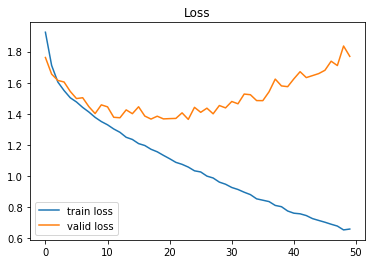

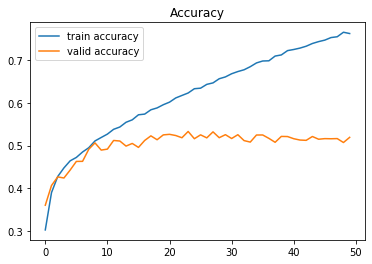

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
"""
Compile 模型
"""

optimizer=keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [11]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=50, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 375us/step - loss: 0.5584 - acc: 0.8060 - val_loss: 1.7159 - val_acc: 0.5252
Epoch 2/50
50000/50000 [==============================] - 17s 347us/step - loss: 0.5153 - acc: 0.8243 - val_loss: 1.7183 - val_acc: 0.5288
Epoch 3/50
50000/50000 [==============================] - 17s 344us/step - loss: 0.4978 - acc: 0.8324 - val_loss: 1.7219 - val_acc: 0.5291
Epoch 4/50
50000/50000 [==============================] - 17s 345us/step - loss: 0.4873 - acc: 0.8372 - val_loss: 1.7264 - val_acc: 0.5304
Epoch 5/50
50000/50000 [==============================] - 17s 350us/step - loss: 0.4801 - acc: 0.8398 - val_loss: 1.7304 - val_acc: 0.5290
Epoch 6/50
50000/50000 [==============================] - 17s 348us/step - loss: 0.4748 - acc: 0.8422 - val_loss: 1.7350 - val_acc: 0.5296
Epoch 7/50
50000/50000 [==============================] - 17s 345us/step - loss: 0.4705 - acc: 0.8444 - val_loss: 1.

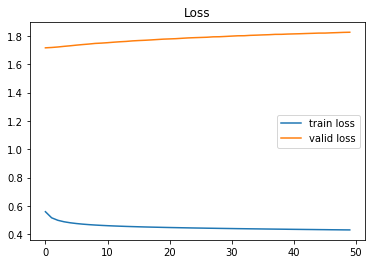

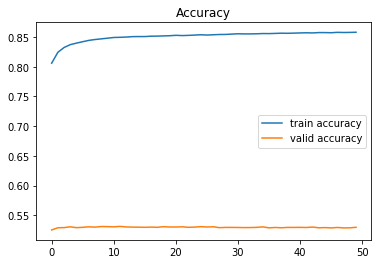

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()